# 스타트와 링크
- source : [백준 14889](https://www.acmicpc.net/problem/14889)
- 난이도 : 실버 II
- 분류 : 브루트 포스 알고리즘, 백트래킹 

## 문제
- 오늘은 스타트링크에 다니는 사람들이 모여서 축구를 해보려고 한다. 축구는 평일 오후에 하고 의무 참석도 아니다. 축구를 하기 위해 모인 사람은 총 N명이고 신기하게도 N은 짝수이다. 이제 N/2명으로 이루어진 스타트 팀과 링크 팀으로 사람들을 나눠야 한다.

- BOJ를 운영하는 회사 답게 사람에게 번호를 1부터 N까지로 배정했고, 아래와 같은 능력치를 조사했다. 능력치 Sij는 i번 사람과 j번 사람이 같은 팀에 속했을 때, 팀에 더해지는 능력치이다. 팀의 능력치는 팀에 속한 모든 쌍의 능력치 Sij의 합이다. Sij는 Sji와 다를 수도 있으며, i번 사람과 j번 사람이 같은 팀에 속했을 때, 팀에 더해지는 능력치는 Sij와 Sji이다.

- N=4이고, S가 아래와 같은 경우를 살펴보자.

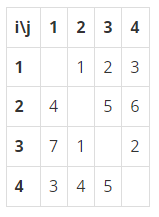

- 예를 들어, 1, 2번이 스타트 팀, 3, 4번이 링크 팀에 속한 경우에 두 팀의 능력치는 아래와 같다.
    - 스타트 팀: S12 + S21 = 1 + 4 = 5
    - 링크 팀: S34 + S43 = 2 + 5 = 7

- 1, 3번이 스타트 팀, 2, 4번이 링크 팀에 속하면, 두 팀의 능력치는 아래와 같다.
    - 스타트 팀: S13 + S31 = 2 + 7 = 9
    - 링크 팀: S24 + S42 = 6 + 4 = 10
    
- 축구를 재미있게 하기 위해서 스타트 팀의 능력치와 링크 팀의 능력치의 차이를 최소로 하려고 한다. 위의 예제와 같은 경우에는 1, 4번이 스타트 팀, 2, 3번 팀이 링크 팀에 속하면 스타트 팀의 능력치는 6, 링크 팀의 능력치는 6이 되어서 차이가 0이 되고 이 값이 최소이다.
    
## 입력
- 첫째 줄에 N(4 ≤ N ≤ 20, N은 짝수)이 주어진다. 둘째 줄부터 N개의 줄에 S가 주어진다. 각 줄은 N개의 수로 이루어져 있고, i번 줄의 j번째 수는 Sij 이다. Sii는 항상 0이고, 나머지 Sij는 1보다 크거나 같고, 100보다 작거나 같은 정수이다.

## 출력
- 첫째 줄에 스타트 팀과 링크 팀의 능력치의 차이의 최솟값을 출력한다.

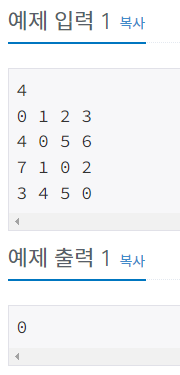

**pseudocode**    
- itertools를 이용할 수 있을 것 같다.
- combinations을 만든 후에, 모든 조합을 더해야하므로 permutaitons을 사용

In [1]:
n = 4
s = [[0, 1, 2, 3],
[4, 0, 5, 6],
[7, 1, 0, 2],
[3, 4, 5, 0]]

In [17]:
s

[[0, 1, 2, 3], [4, 0, 5, 6], [7, 1, 0, 2], [3, 4, 5, 0]]

In [3]:
player = [i for i in range(4)]
player

[0, 1, 2, 3]

In [10]:
from itertools import combinations
from itertools import permutations

In [12]:
p_comb = list(combinations(player, n//2))
print(p_comb, len(p_comb))

[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)] 6


- 조합의 절반을 기준으로 start, link 두 팀으로 나눌 수 있다.

In [24]:
dif_list = []
for start in range(len(p_comb)//2):
    sum_start, sum_link = 0, 0
    for i, j in list(permutations(p_comb[start],2)):
        sum_start += s[i][j]
    for i, j in list(permutations(p_comb[len(p_comb)-start-1], 2)):
        sum_link += s[i][j]
    dif_list.append(abs(sum_start - sum_link))

print(dif_list)
print(min(dif_list))

[2, 1, 0]
0


**첫 번째 시도**

In [43]:
import sys
from itertools import combinations
from itertools import permutations

n = int(sys.stdin.readline())
s = []
for i in range(n):
    s.append(list(map(int, sys.stdin.readline().split())))

player = [i for i in range(n)]
p_comb = list(combinations(player, n//2))  # 팀 구성 조합

dif_list = [] # 최솟값을 구하기 위한 리스트 
for start in range(len(p_comb)//2):
    sum_start, sum_link = 0, 0
    for i, j in list(permutations(p_comb[start],2)):
        sum_start += s[i][j]
    for i, j in list(permutations(p_comb[len(p_comb)-start-1], 2)):
        sum_link += s[i][j]
    dif_list.append(abs(sum_start - sum_link))

print(min(dif_list))

62


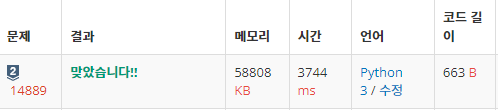

- 채점이 꽤 오래걸렸다...!
- dfs를 사용한 풀이가 많던데 dfs로 다시 풀어봐야겠다.
- 두 팀으로 나누는 로직은 다른 풀이를 참고했다.
    - [Ref1](https://ez17.tistory.com/7)
    - [Ref2](https://velog.io/@qweadzs/BOJ-14889-%EC%8A%A4%ED%83%80%ED%8A%B8%EC%99%80-%EB%A7%81%ED%81%ACPython)